In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Data/weather_data.csv", encoding = 'unicode_escape')
df.tail()

,Month,Year,Temperature,Humidity,Pressure
167,12,2022,5 °C,88%,1011 mbar
168,1,2023,5 °C,85%,1014 mbar
169,2,2023,7 °C,80%,1028 mbar
170,3,2023,8 °C,80%,1008 mbar
171,4,2023,10 °C,73%,1016 mbar


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        172 non-null    int64 
 1   Year         172 non-null    int64 
 2   Temperature  172 non-null    object
 3   Humidity     172 non-null    object
 4   Pressure     172 non-null    object
dtypes: int64(2), object(3)
memory usage: 6.8+ KB


In [4]:
# Rename columns

df.rename(columns={'Temperature': 'Temp(°C)', 'Humidity': 'Humidity (%)', 'Pressure' : 'Pressure (mbar)'}, inplace=True)

# REmove characters from columns
df["Temp(°C)"] = df["Temp(°C)"].str.strip(" °C").astype(int)
df["Humidity (%)"] = df["Humidity (%)"].str.strip("%").astype(int)
df["Pressure (mbar)"] = df["Pressure (mbar)"].str.strip(" mbar").astype(int)

# Merge Month and year columns to date format
df["Date"] = pd.to_datetime(df["Year"].astype(str) + "-" + df["Month"].astype(str), format="%Y-%m")
df.drop(columns=["Month", "Year"], inplace=True)
df.head()

,Temp(°C),Humidity (%),Pressure (mbar),Date
0,12,75,1016,2009-01-01
1,12,75,1016,2009-02-01
2,12,75,1016,2009-03-01
3,12,75,1016,2009-04-01
4,12,75,1016,2009-05-01


In [5]:
# Drop all rows up to 2021-04-01
df = df[df["Date"] >= "2021-04-01"]

In [6]:
# df.drop(index=df.index[:7], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,Temp(°C),Humidity (%),Pressure (mbar),Date
0,8,61,1023,2021-04-01
1,12,73,1010,2021-05-01
2,18,72,1018,2021-06-01
3,19,73,1014,2021-07-01
4,17,75,1017,2021-08-01


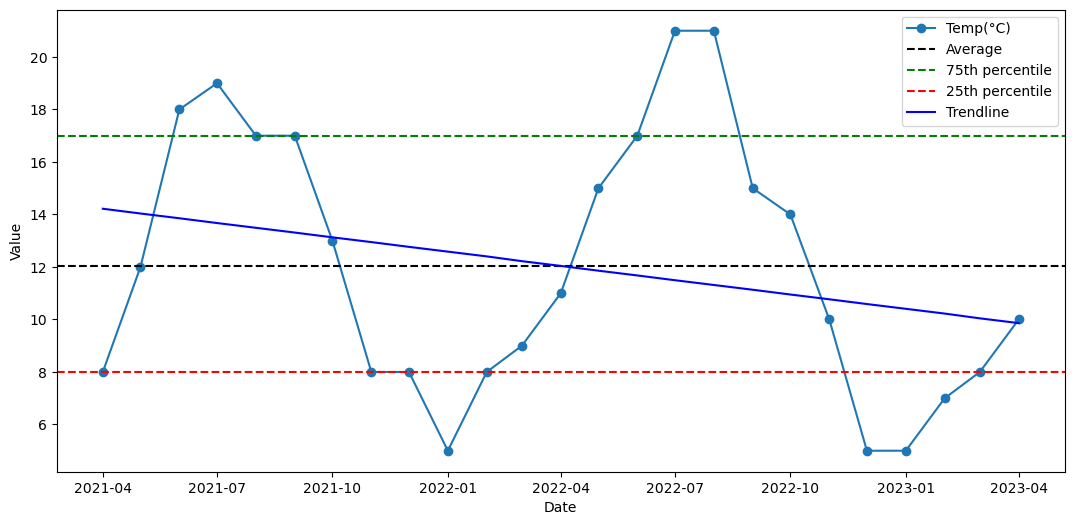

In [7]:
# Create a line plot with markers for the Temp(°C), Humidity (%), and Pressure (mbar) columns
fig, ax = plt.subplots(figsize=(13, 6))

ax.plot(df["Date"], df["Temp(°C)"], label="Temp(°C)", marker="o")


# Calculate the average, 75th percentile, and 25th percentile for the Temp(°C) column
temp_mean = df["Temp(°C)"].mean()
temp_75 = df["Temp(°C)"].quantile(0.75)
temp_25 = df["Temp(°C)"].quantile(0.25)

# Add horizontal lines for the average, 75th percentile, and 25th percentile
ax.axhline(temp_mean, color="black", linestyle="--", label="Average")
ax.axhline(temp_75, color="green", linestyle="--", label="75th percentile")
ax.axhline(temp_25, color="red", linestyle="--", label="25th percentile")


# Add a trendline for the Temp(°C) data
x = np.arange(len(df["Temp(°C)"]))
m, b = np.polyfit(x, df["Temp(°C)"], 1)
ax.plot(df["Date"], m * x + b, color="blue", label="Trendline")

# Set the axis labels and legend
ax.set_xlabel("Date")
ax.set_ylabel("Value")
ax.legend()

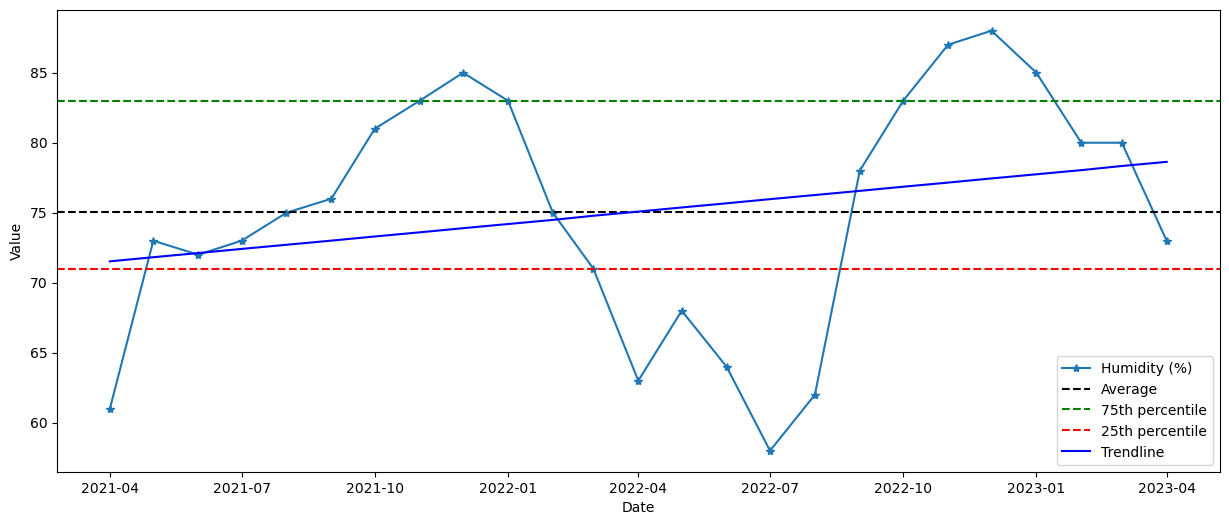

In [8]:
# Create a line plot with markers for the Humidity (%)
fig, ax = plt.subplots(figsize=(15, 6))


ax.plot(df["Date"], df["Humidity (%)"], label="Humidity (%)", marker="*")

# Calculate the average, 75th percentile, and 25th percentile for the Humidity (%) column
Humid_mean = df["Humidity (%)"].mean()
Humid_75 = df["Humidity (%)"].quantile(0.75)
Humid_25 = df["Humidity (%)"].quantile(0.25)

# Add horizontal lines for the average, 75th percentile, and 25th percentile
ax.axhline(Humid_mean, color="black", linestyle="--", label="Average")
ax.axhline(Humid_75, color="green", linestyle="--", label="75th percentile")
ax.axhline(Humid_25, color="red", linestyle="--", label="25th percentile")

# Add a trendline to the plot
x = np.arange(len(df["Humidity (%)"]))
m, b = np.polyfit(x, df["Humidity (%)"], 1)
ax.plot(df["Date"], m*x + b, color="blue", label="Trendline")

# Set the axis labels and legend
ax.set_xlabel("Date")
ax.set_ylabel("Value")
ax.legend()

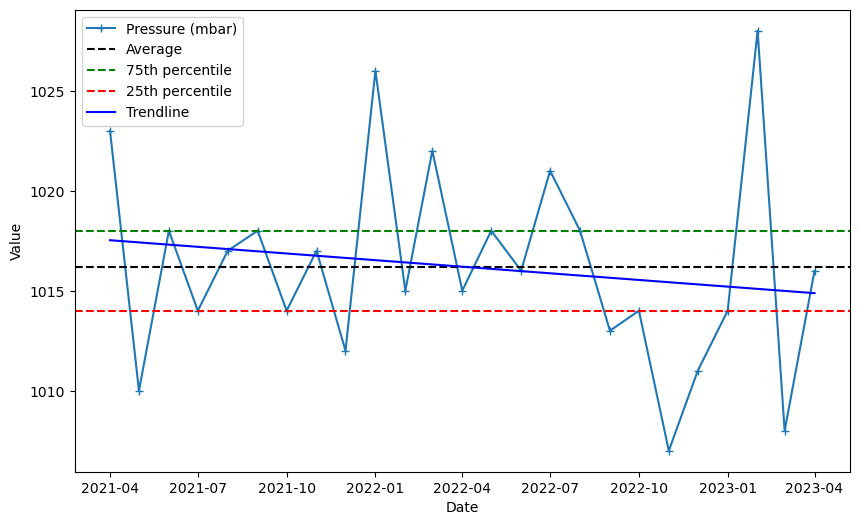

In [9]:
# Create a line plot with markers for the Pressure (mbar)
fig, ax = plt.subplots(figsize=(10, 6))


ax.plot(df["Date"], df["Pressure (mbar)"], label="Pressure (mbar)", marker="+")

# Calculate the average, 75th percentile, and 25th percentile for the Pressure (mbar) column
Pres_mean = df["Pressure (mbar)"].mean()
Pres_75 = df["Pressure (mbar)"].quantile(0.75)
Pres_25 = df["Pressure (mbar)"].quantile(0.25)

# Add horizontal lines for the average, 75th percentile, and 25th percentile
ax.axhline(Pres_mean, color="black", linestyle="--", label="Average")
ax.axhline(Pres_75, color="green", linestyle="--", label="75th percentile")
ax.axhline(Pres_25, color="red", linestyle="--", label="25th percentile")

# Add a trendline
z = np.polyfit(df["Date"].astype(np.int64)//10**9, df["Pressure (mbar)"], 1)
p = np.poly1d(z)
ax.plot(df["Date"], p(df["Date"].astype(np.int64)//10**9),  color="blue", linestyle="-", label="Trendline")

# Set the axis labels and legend
ax.set_xlabel("Date")
ax.set_ylabel("Value")
ax.legend()

In [9]:
df.head()

,Temp(°C),Humidity (%),Pressure (mbar),Date
0,12,75,1016,2009-08-01
1,15,76,1025,2009-09-01
2,12,82,1017,2009-10-01
3,10,84,1000,2009-11-01
4,4,90,1006,2009-12-01


In [31]:
# df['Date'] = pd.to_datetime(df['Date'])
df.reset_index(drop=True)

,Temp(°C),Humidity (%),Pressure (mbar),Date
0,0.55,0.583333,0.56250,2009-08-01
1,0.70,0.611111,0.84375,2009-09-01
2,0.55,0.777778,0.59375,2009-10-01
3,0.45,0.833333,0.06250,2009-11-01
4,0.15,1.000000,0.25000,2009-12-01
...,...,...,...,...
160,0.20,0.944444,0.40625,2022-12-01
161,0.20,0.861111,0.50000,2023-01-01
162,0.30,0.722222,0.93750,2023-02-01
163,0.35,0.722222,0.31250,2023-03-01


In [32]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
cols_to_normalize = ["Temp(°C)", "Humidity (%)", "Pressure (mbar)"]
df[cols_to_normalize] = scaler.fit_transform(df[cols_to_normalize])

In [33]:
from torch.utils.data import Dataset, DataLoader

df['Date'] = pd.to_datetime(df['Date'])


# Normalize the data
# norm_df = (df - df.mean()) / df.std()

# num_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
# # num_cols.remove("Date")
# df[num_cols] = (df[num_cols] - df[num_cols].mean()) / df[num_cols].std()



In [34]:

# Define the dataset class
class WeatherDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [35]:
data = df.to_numpy()

In [36]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from nbeats_pytorch.model import NBeatsNet
import torch
from torch import optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


In [37]:
batch_size = 128
train_loader = DataLoader(dataset=WeatherDataset(df), batch_size=batch_size, shuffle=True)

# train_loader = np.array(DataLoader(dataset=WeatherDataset(df), batch_size=batch_size, shuffle=True))



# Define the model and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = NBeatsNet(device=device,
                    stack_types=[NBeatsNet.GENERIC_BLOCK, NBeatsNet.GENERIC_BLOCK],
                    forecast_length=1,
                    thetas_dim=[4, 4],
                    nb_blocks_per_stack=2,
                    hidden_layer_units=128,
                    share_weights_in_stack=False)
optimizer = torch.optim.Adam(model.parameters())


| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=4, backcast_length=10, forecast_length=1, share_thetas=False) at @2004709054816
     | -- GenericBlock(units=128, thetas_dim=4, backcast_length=10, forecast_length=1, share_thetas=False) at @2004789259872
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=128, thetas_dim=4, backcast_length=10, forecast_length=1, share_thetas=False) at @2004790076864
     | -- GenericBlock(units=128, thetas_dim=4, backcast_length=10, forecast_length=1, share_thetas=False) at @2004790077632


In [38]:
type(train_loader)

torch.utils.data.dataloader.DataLoader

In [41]:
# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    for i, batch in enumerate(train_loader):
        if batch.ndim == 0:
            print('hhhh')  
        x = batch[:, :]  # Exclude the first column (Date)
        y = batch[:, 0]  # Target column is the first column (Temp)
        
        optimizer.zero_grad()
        y_pred = model(x)
        loss = torch.mean((y_pred.squeeze() - y)**2)
        loss.backward()
        optimizer.step()

        print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')


KeyError: 72

In [30]:
len(df)

165

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from nbeats_pytorch.model import NBeatsNet
import torch
from torch import optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


In [ ]:

# Set the 'Date' column as the index of the dataframe
df.set_index('Date', inplace=True)

# Split the dataset into train and test sets
train_size = int(len(df) * 0.8)
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]

# Scale the data
scaler = StandardScaler()
train_df = pd.DataFrame(scaler.fit_transform(train_df),
                            columns=train_df.columns,
                            index=train_df.index)
test_df = pd.DataFrame(scaler.transform(test_df),
                        columns=test_df.columns,
                        index=test_df.index)


In [ ]:

# Define the model
model = NBeatsNet(device='cpu',
                    backcast_length=20,
                    forecast_length=5,
                    thetas_dim=[2, 2],
                    nb_blocks_per_stack=3,
                    hidden_layer_units=128,
                    stack_types=(NBeatsNet.TREND_BLOCK, NBeatsNet.SEASONALITY_BLOCK),
                    share_weights_in_stack=False,
                )

In [ ]:

# Define the optimizer
optimizer = optim.Adam(model.parameters())

# Define the loss function
loss_func = torch.nn.MSELoss()


In [ ]:
# Train the model
n_epochs = 100
train_losses = []
test_losses = []
for epoch in range(n_epochs):
    # Train the model on the training set
    model.train()
    optimizer.zero_grad()
    x, y = train_df.iloc[:-1].values, train_df.iloc[1:].values
    x = torch.from_numpy(x).float().unsqueeze(0).cpu()
    y = torch.from_numpy(y).float().unsqueeze(0).cpu()
    y_pred = model(x)
    loss = loss_func(y_pred, y)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    # Evaluate the model on the test set
    model.eval()
    with torch.no_grad():
        x, y = test_df.iloc[:-1].values, test_df.iloc[1:].values
        x = torch.from_numpy(x).float().unsqueeze(0).cuda()
        y = torch.from_numpy(y).float().unsqueeze(0).cuda()
        y_pred = model(x)
        loss = loss_func(y_pred, y)
        test_losses.append(loss.item())

    print(f"Epoch {epoch+1}/{n_epochs}, Train Loss: {train_losses[-1]:.6f}, Test Loss: {test_losses[-1]:.6f}")

# Plot the training and test losses
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.show()

# Make predictions on the test set
model.eval()
with torch.no_grad():
    x = torch.from_numpy(test_df.values[:-1]).float().unsqueeze(0).cuda()
    y = test_df.values[1:, 0]
    y_pred = model(x).squeeze().cpu().numpy()

# Unscale the predictions and actual values
y = scaler.inverse_transform(y.reshape(-1, 1)).flatten()
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()

# Calculate and print the RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))
print(f"RMSE: {rmse}")